In [ ]:
%load_ext autoreload

# The above makes it so you don't have to restart your kernel every time you change one of the external files.

**Citation:** The following questions and supporting code were originally developed as part of Dr. Eric Eaton's [Introduction to Machine Learning Course at U Penn](https://www.cis.upenn.edu/~cis5190/fall2014/). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

from utils import load_dataset

# Polynomial Regression

**Relevant Files:**
    
- ```plot_polyreg_learningCurve.py```

**3.1**. [10 points] Recall that polynomial regression learns a function $h_{\theta}(x) = \theta_{0} + \theta_{1}x + \theta_{2}x^{2} + \ldots + \theta_{d} x^{d}$, where $d$ represents the polynomial’s highest degree. We can equivalently write this in the form of a linear model with $d$ features 

$$
h_{\theta}(x) = \theta_{0} + \theta_{1}\psi_{1}(x) + \theta_{2}\psi_{2}(x) + \ldots + \theta_{d} \psi_{d}(x),
$$

using the basis expansion that $\psi_{j}(x) = x^{j}$. Notice that, with this basis expansion, we obtain a linear model where the features are various powers of the single univariate x. We’re still solving a linear regression problem, but are fitting a polynomial function of the input.

Implement regularized polynomial regression in ```PolynomialRegression``` class below. Implement it using
a closed-form least-squares solution. We can use the closed-form solution because the data
sets are small; below is a closed-form implementation of least squares fitting, but make CERTAIN you understand it, since you may need to change several lines of it). 

In [ ]:
### modify this code as necessary ###

class LinearRegressionClosedForm:
    def __init__(self, reg_lambda=1e-8):
        """
        Constructor
        """
        self.regLambda = reg_lambda
        self.theta = None

    def fit(self, X, y):
        """
            Trains the model
            Arguments:
                X is a n-by-d array
                y is an n-by-1 array
            Returns:
                No return value
        """
        n = len(X)

        # add 1s column
        X_ = np.c_[np.ones([n, 1]), X]

        n, d = X_.shape
        # remove 1 for the extra column of ones we added to get the original num features
        d = d - 1

        # construct reg matrix
        reg_matrix = self.regLambda * np.eye(d + 1)
        reg_matrix[0, 0] = 0

        # analytical solution (X'X + regMatrix)^-1 X' y
        self.theta = np.linalg.pinv(X_.T.dot(X_) + reg_matrix).dot(X_.T).dot(y)

    def predict(self, X):
        """
        Use the trained model to predict values for each instance in X
        Arguments:
            X is a n-by-d numpy array
        Returns:
            an n-by-1 numpy array of the predictions
        """
        n = len(X)

        # add 1s column
        X_ = np.c_[np.ones([n, 1]), X]

        # predict
        return X_.dot(self.theta)



Note that in the PolynomialRegression class all matrices are actually 2D numpy arrays in the implementation.

- ```__init__(degree=1, regLambda=1E-8)``` : constructor with arguments of $d$ and $\lambda$
- ```fit(X,Y)```: method to train the polynomial regression model
- ```predict(X)```: method to use the trained polynomial regression model for prediction
- ```polyfeatures(X, degree)```: expands the given $n\times 1$ matrix $X$ into an $n\times d$ matrix of polynomial features of degree $d$. Note that the returned matrix will not include the zero-th power.

Note that the ```polyfeatures(X, degree)``` function maps the original univariate data into its higher order powers. Specifically, $X$ will be an $n \times 1$ matrix ($X \in \mathbb{R}^{n\times 1}$ ) and this function will return the polynomial expansion of this data, a $n \times d$ matrix. Note that this function will not add in the zero-th order feature (i.e., $x_0 = 1$). You should add the $x_0$ feature separately, outside of this function, before training the model.

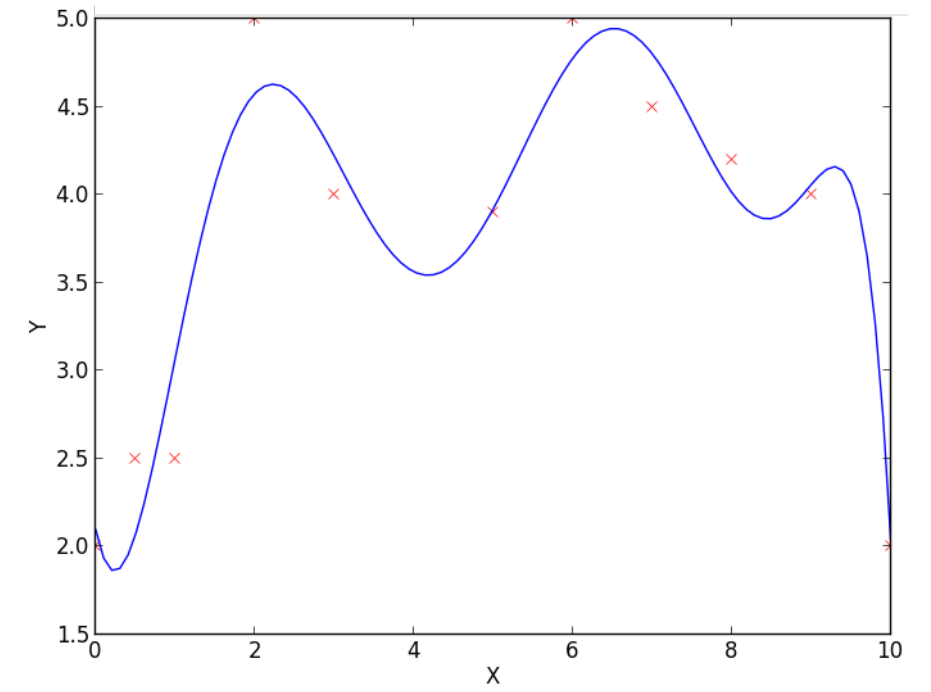

Figure 1: Fit of a Polynomial regression with $\lambda = 0$ and $d = 8$.

By not including the $x_0$ column in the matrix ```polyfeatures()```, this allows the polyfeatures function to be more general, so it could be applied to multi-variate data as well. (If it did add the $x_0$ feature, we’d end up with multiple columns of 1’s for multivariate data.) Also, notice that the resulting features will be badly scaled if we use them in raw form. For example, with a polynomial of degree $d = 8$ and $x = 20$, the basis expansion yields $x_1 = 20$ while $x_8 = 2.56 \times 10^{10}$ – an absolutely huge difference in range. Consequently, we will need to standardize the data before solving linear regression. 

Standardizing is when you scale your data's features to fall within a standard normal distribution.  To normalize a feature, $\psi(x)_{j}$, you compute:

$$
\psi'(x_{i})_{j} = \frac{\psi(x_{i})_{j} - \mathbb{E}_{x}[\psi(x_{i})_{j}]}{\sqrt{\mathrm{Var}_{x}[\psi(x_{i})_{j}]}}.
$$

Standardize the data in ```fit()``` after you perform the polynomial feature expansion. You’ll need to apply the same standardization transformation in ```predict()``` before you apply it to new data.


Run ```plot_polyreg_univariate``` to test your implementation, which will plot the learned function. In this
case, the script fits a polynomial of degree $d = 8$ with no regularization $\lambda = 0$. From the plot, we see that the function fits the data well, but will not generalize well to new data points. Try increasing the amount
of regularization, and in 1-2 sentences, describe the resulting effect on the function (you may also provide an
additional plot to support your analysis).

**What to Submit:**
- 1-2 sentence description of the effect of increasing regularization.
- Plots before and after increase in regularization.
- **Code** on Learn through coding submission as a completed jupyter notebook.

In [ ]:
### Your answer here ###

class PolynomialRegression:
    def __init__(self, degree: int = 1, reg_lambda: float = 1e-8):
        """Constructor
        """
        self.degree: int = degree
        self.reg_lambda: float = reg_lambda
        # Fill in with matrix with the correct shape
        self.weight: np.ndarray = None  # type: ignore
        # You can add additional fields
        raise NotImplementedError("Your Code Goes Here")

    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        Trains the model, and saves learned weight in self.weight

        Args:
            X (np.ndarray): Array of shape (n, 1) with observations.
            y (np.ndarray): Array of shape (n, 1) with targets.

        Note:
            You need to apply polynomial expansion and scaling at first.
        """
        raise NotImplementedError("Your Code Goes Here")

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Use the trained model to predict values for each instance in X.

        Args:
            X (np.ndarray): Array of shape (n, 1) with observations.

        Returns:
            np.ndarray: Array of shape (n, 1) with predictions.
        """
        raise NotImplementedError("Your Code Goes Here")
        
    @staticmethod
    def polyfeatures(X: np.ndarray, degree: int) -> np.ndarray:
        """
        Expands the given X into an (n, degree) array of polynomial features of degree degree.

        Args:
            X (np.ndarray): Array of shape (n, 1).
            degree (int): Positive integer defining maximum power to include.

        Returns:
            np.ndarray: A (n, degree) numpy array, with each row comprising of
                X, X * X, X ** 3, ... up to the degree^th power of X.
                Note that the returned matrix will not include the zero-th power.

        """
        raise NotImplementedError("Your Code Goes Here")


def mean_squared_error(a: np.ndarray, b: np.ndarray) -> float:
    """Given two arrays: a and b, both of shape (n, 1) calculate a mean squared error.

    Args:
        a (np.ndarray): Array of shape (n, 1)
        b (np.ndarray): Array of shape (n, 1)

    Returns:
        float: mean squared error between a and b.
    """
    raise NotImplementedError("Your Code Goes Here")

In [ ]:
def plot_polyreg_univariate(d=8, reg_lamb=0):
    allData = load_dataset("polyreg")

    X = allData[:, [0]]
    y = allData[:, [1]]

    # regression with degree = d
    model = PolynomialRegression(degree=d, reg_lambda=reg_lamb)
    model.fit(X, y)

    # output predictions
    xpoints = np.linspace(np.max(X), np.min(X), 100).reshape(-1, 1)
    ypoints = model.predict(xpoints)

    # plot curve
    plt.figure()
    plt.plot(X, y, "rx")
    plt.title(f"PolyRegression with d = {d}")
    plt.plot(xpoints, ypoints, "b-")
    plt.xlabel("X")
    plt.ylabel("Y")

plot_polyreg_univariate()

**3.2**. [10 points] In this problem we will examine the bias-variance tradeoff through learning curves. Learning
curves provide a valuable mechanism for evaluating the bias-variance tradeoff. Implement the ```learning_curve()``` function below to compute the learning curves for a given training/test set. The ```learning_curve(Xtrain, ytrain, Xtest, ytest, degree, regLambda)``` function should take in the training data (```Xtrain```, ```ytrain```), the testing data (```Xtest```, ```ytest```), and values for the polynomial degree $d$ and regularization parameter $\lambda$. The function should return two arrays, ```errorTrain``` (the array of training errors) and ```errorTest``` (the array of testing errors). The $i^\mathrm{th}$ index (start from 0) of each array should return the training error (or testing error) for learning with $i + 1$ training instances. Note that the $0^\mathrm{th}$ index actually won’t matter, since we typically start displaying
the learning curves with two or more instances.

When computing the learning curves, you should learn on ```Xtrain[0:i]``` for $i = 1, \ldots,$ ```numInstances(Xtrain)```, each time computing the testing error over the entire test set. There is no need to shuffle the training data, or to average the error over multiple trials – just produce the learning curves for the given training/testing sets with the instances in their given order. Recall that the error for regression problems is given by:

$$
\frac{1}{n}\sum_{i=1}^{n}(h_\theta(\mathbf{x}_{i})-y_{i})^{2}
$$

Once the function is written to compute the learning curves, run the ```plot_polyreg_learningCurve.py``` script
to plot the learning curves for various values of $\lambda$ and $d$. You should see plots similar to the following:

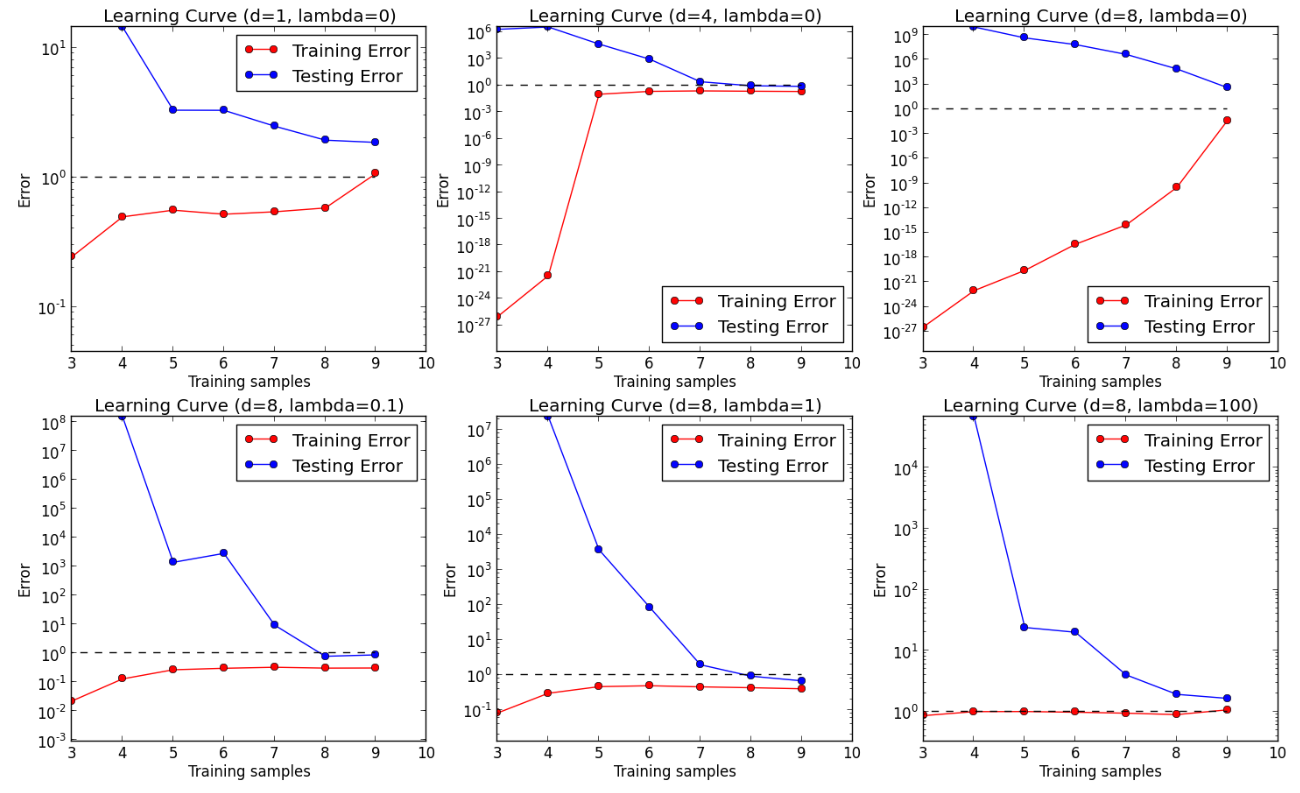

Figure 2: Learning curves for various values of $d$ and $\lambda$. The blue lines represent the testing error, while the red lines the training error. 

Notice the following:
- The y-axis is using a log-scale and the ranges of the y-scale are all different for the plots. The dashed black line indicates the $y = 1$ line as a point of reference between the plots.
- The plot of the unregularized model with $d = 1$ shows poor training error, indicating a high bias (_i.e._, it is a standard univariate linear regression fit).
- The plot of the (almost) unregularized model ($\lambda = 10^{−6}$ ) with $d = 8$ shows that the training error is low, but that the testing error is high. There is a huge gap between the training and testing errors caused by the model overfitting the training data, indicating a high variance problem.
- As the regularization parameter increases (e.g., $\lambda = 1$) with $d = 8$, we see that the gap between the training and testing error narrows, with both the training and testing errors converging to a low value. We can see that the model fits the data well and generalizes well, and therefore does not have either a high bias or a high variance problem. Effectively, it has a good tradeoff between bias and variance.
- Once the regularization parameter is too high ($\lambda = 100$), we see that the training and testing errors are once again high, indicating a poor fit. Effectively, there is too much regularization, resulting in high bias. Submit plots for the same values of $d$ and $\lambda$ shown here. Make absolutely certain that you understand these observations, and how they relate to the learning curve plots. In practice, we can choose the value for $\lambda$ via cross-validation to achieve the best bias-variance tradeoff.

**What to Submit:**
- Plots (or single plot with many subplots) of learning curves for $(d, \lambda) \in \{(1, 0), (8, 10^{−6}), (8, 1), (8, 100)\}$.
- **Code** on Learn through coding submission through the completed jupyter notebook.

In [ ]:
### your answer here ###

def learning_curve(
    Xtrain: np.ndarray,
    Ytrain: np.ndarray,
    Xtest: np.ndarray,
    Ytest: np.ndarray,
    reg_lambda: float,
    degree: int,
) -> Tuple[np.ndarray, np.ndarray]:
    """Compute learning curves.

    Args:
        Xtrain (np.ndarray): Training observations, shape: (n, 1)
        Ytrain (np.ndarray): Training targets, shape: (n, 1)
        Xtest (np.ndarray): Testing observations, shape: (n, 1)
        Ytest (np.ndarray): Testing targets, shape: (n, 1)
        reg_lambda (float): Regularization factor
        degree (int): Polynomial degree

    Returns:
        Tuple[np.ndarray, np.ndarray]: Tuple containing:
            1. errorTrain -- errorTrain[i] is the training mean squared error using model trained by Xtrain[0:(i+1)]
            2. errorTest -- errorTest[i] is the testing mean squared error using model trained by Xtrain[0:(i+1)]

    Note:
        - For errorTrain[i] only calculate error on Xtrain[0:(i+1)], since this is the data used for training.
            THIS DOES NOT APPLY TO errorTest.
        - errorTrain[0:1] and errorTest[0:1] won't actually matter, since we start displaying the learning curve at n = 2 (or higher)
    """
    n = len(Xtrain)

    errorTrain = np.zeros(n)
    errorTest = np.zeros(n)
    # Fill in errorTrain and errorTest arrays
    raise NotImplementedError("Your Code Goes Here")

In [ ]:
from poly_regression.plot_polyreg_learningCurve import generateLearningCurve

def plot_polyreg_learningCurve():
    allData = load_dataset("polyreg")

    X = allData[:, [0]]
    y = allData[:, [1]]

    # generate Learning curves for different params
    plt.figure(figsize=(15, 9), dpi=100)
    plt.subplot(2, 3, 1)
    generateLearningCurve(X, y, 1, 0, learning_curve)
    plt.subplot(2, 3, 2)
    generateLearningCurve(X, y, 4, 1e-6, learning_curve)
    plt.subplot(2, 3, 3)
    generateLearningCurve(X, y, 8, 1e-6, learning_curve)
    plt.subplot(2, 3, 4)
    generateLearningCurve(X, y, 8, 0.1, learning_curve)
    plt.subplot(2, 3, 5)
    generateLearningCurve(X, y, 8, 1, learning_curve)
    plt.subplot(2, 3, 6)
    generateLearningCurve(X, y, 8, 100, learning_curve)

plot_polyreg_learningCurve()

# Ridge Regression (a.k.a. Regularized Least Squares) on MNIST

**3.3**. In this problem we will implement a regularized least squares classifier for the MNIST data set. The task is to classify handwritten images of numbers between 0 to 9.

You are NOT allowed to use any of the pre-built classifiers in ```sklearn```. Feel free to use any method from ```numpy``` or ```scipy```. Remember: if you are inverting a matrix in your code, you are probably doing something wrong (Hint: look at ```scipy.linalg.solve```).

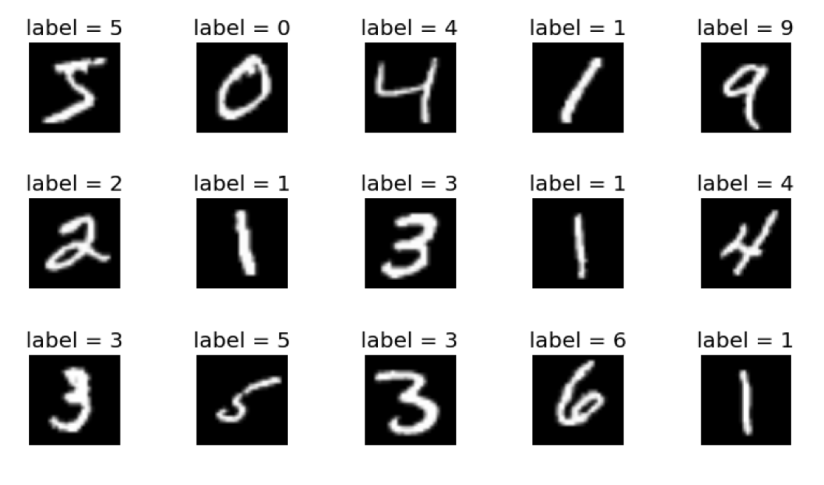
Figure 3: Sample images from the MNIST data set.

Each example has features $x_{i} \in \mathbb{R}^{d}$ (with $d = 28 \times 28 = 784$) and label $z_{j} \in \{0, \ldots , 9\}$. You can visualize a single example $x_i$ with ```imshow``` after reshaping it to its original $28 \times 28$ image shape (and noting that the label $z_j$ is accurate). Checkout Figure 3 for some sample images. We wish to learn a predictor $\hat{f}$ that takes as input a vector in $\mathbb{R}^{d}$ and outputs an index in $\{0, \ldots , 9\}$. We define our training and testing classification error on a predictor $f$ as:

$$
\hat{\epsilon}_\mathrm{train}(f) = \frac{1}{N_\mathrm{train}} \sum_{(x,z) \in \mathrm{Training Set}} \mathbb{1}(f(x) \neq z)
$$

$$
\hat{\epsilon}_\mathrm{test}(f) = \frac{1}{N_\mathrm{test}} \sum_{(x,z) \in \mathrm{Testing Set}} \mathbb{1}(f(x) \neq z)
$$

We will use one-hot encoding of the labels: for each observation $(x, z)$, the original label $z \in \{0, \ldots , 9\}$ is mapped to the standard basis vector $e_{z+1}$ where $e_{i}$ is a vector of size $k$ containing all zeros except for a 1 in the $i^\mathrm{th}$ position (positions in these vectors are indexed starting at one, hence the $z + 1$ offset for the digit labels). We adopt the notation where we have $n$ data points in our training objective with features $x_{i} \in \mathbb{R}^{d}$ and label one-hot encoded as $\mathbf{y}_{i} \in \{0, 1\}^{k}$ . Here, $k = 10$ since there are 10 digits.

a. [10 points] In this problem we will choose a linear classifier to minimize the regularized least squares
objective:

$$
\hat{W} = \arg\min_{W\in \mathbb{R}^{d\times k}} \|W^{T}\mathbf{x}_{i} - y_{i}\|^{2}_{2} + \lambda\|W\|_{F}^{2}
$$

Note that $\|W\|_{F}$ corresponds to the Frobenius norm of W, _i.e._, $\|W\|^{2}_{F} = \sum_{i=1}^{d}\sum_{j=1}^{k}W_{i,j}^{2}$. To classify a point $\mathbf{x}_{i}$ we will use the rule $\arg\max_{j=0,\ldots,9} e^{T}_{j+1} \hat{W}\mathbf{x}_{i}$.  Note that if $W = [\mathbf{w}_{1},\ldots,\mathbf{w}_{k}]$ then

$
\begin{align}
\sum_{i=1}^{n}\|W^{T}\mathbf{x}_{i} - y_{i} \|^{2}_{2} + \lambda \|W\|_{F}^{2} &= \sum_{j=1}^{k}\left[\sum_{i=1}^{n}(e_{j}^{T}W^{T}\mathbf{x}_{i} - e_{j}^{T}\mathbf{y}_{i})^{2} + \lambda \|We_{j}\|^{2}\right] \\
&= \sum_{j=1}^{k}\left[\sum_{i=1}^{n}(\mathbf{w}_{j}^{T}\mathbf{x}_{i} - e_{j}^{T}\mathbf{y}_{i})^{2} + \lambda \|\mathbf{w}_{j}\|^{2}\right] \\
&= \sum_{j=1}^{k}\left[\|X\mathbf{w}_{j} - Ye_{j}\|^{2} + \lambda\|\mathbf{w}_{j}\|^{2}\right]
\end{align}
$

where $X = [\mathbf{x}_{1},\ldots,\mathbf{x}_{n}]^{T} \in \mathbb{R}^{n\times d}$ and $Y = [\mathbf{y}_{1},\ldots,\mathbf{y}_{n}]^{T} \in \mathbb{R}^{n\times k}$. Show that:

$$
\hat{W} = (X^{T}X + \lambda I)^{-1}X^{T}Y
$$

b. [10 points]
- Implement a function train that takes as input $X \in \mathbb{R}^{n\times d}$, $Y \in \{0, 1\}^{n\times k}$ , $\lambda > 0$ and returns $W \in \mathbb{R}^{d\times k}$.
- Implement a function one_hot that takes as input $Y \in \{0, \ldots, k−1\}^{n}$, and returns $Y \in \{0, 1\}^{n\times k}$.
- Implement a function predict that takes as input $W \in \mathbb{R}^{d\times k}$, $X' \in \mathbb{R}^{m\times d}$ and returns an $m$-length vector with the $i^\mathrm{th}$ entry equal to $\arg\max_{j=0,\ldots,9} \mathbf{e}^{T}_{j} W^{T}\mathbf{x′}_{i}$ where $\mathbf{x′}_{i} \in \mathbb{R}^{d}$ is a column vector representing the $i^\mathrm{th}$ example from $X′$.
- Using the functions you coded above, train a model to estimate $\hat{W}$ on the MNIST training data with $\lambda = 10^{-4}$, and make label predictions on the test data. This behavior is implemented in ```main``` function provided. What is the training and testing error? Note that they should both be about 15%.


Once you finish this problem question, you should have a very powerful classifier for handwritten digits! The model we just built is actually a 1-layer neural network: more on this soon!

**What to Submit:**
- **Part A:** Derivation of expression for $\hat{W}$
- **Part B:** Values of training and testing errors
- **Code** on Learn as the completed jupyter notebook

In [ ]:
### your code here ###

def train(x: np.ndarray, y: np.ndarray, _lambda: float) -> np.ndarray:
    """Train function for the Ridge Regression problem.
    Should use observations (`x`), targets (`y`) and regularization parameter (`_lambda`)
    to train a weight matrix $$\\hat{W}$$.


    Args:
        x (np.ndarray): observations represented as `(n, d)` matrix.
            n is number of observations, d is number of features.
        y (np.ndarray): targets represented as `(n, k)` matrix.
            n is number of observations, k is number of classes.
        _lambda (float): parameter for ridge regularization.

    Raises:
        NotImplementedError: When problem is not attempted.

    Returns:
        np.ndarray: weight matrix of shape `(d, k)`
            which minimizes Regularized Squared Error on `x` and `y` with hyperparameter `_lambda`.
    """
    raise NotImplementedError("Your Code Goes Here")


def predict(x: np.ndarray, w: np.ndarray) -> np.ndarray:
    """Train function for the Ridge Regression problem.
    Should use observations (`x`), and weight matrix (`w`) to generate predicated class for each observation in x.

    Args:
        x (np.ndarray): observations represented as `(n, d)` matrix.
            n is number of observations, d is number of features.
        w (np.ndarray): weights represented as `(d, k)` matrix.
            d is number of features, k is number of classes.

    Raises:
        NotImplementedError: When problem is not attempted.

    Returns:
        np.ndarray: predictions matrix of shape `(n,)` or `(n, 1)`.
    """
    raise NotImplementedError("Your Code Goes Here")


def one_hot(y: np.ndarray, num_classes: int) -> np.ndarray:
    """One hot encode a vector `y`.
    One hot encoding takes an array of integers and coverts them into binary format.
    Each number i is converted into a vector of zeros (of size num_classes), with exception of i^th element which is 1.

    Args:
        y (np.ndarray): An array of integers [0, num_classes), of shape (n,)
        num_classes (int): Number of classes in y.

    Returns:
        np.ndarray: Array of shape (n, num_classes).
        One-hot representation of y (see below for example).

    Example:
        ```python
        > one_hot([2, 3, 1, 0], 4)
        [
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [0, 1, 0, 0],
            [1, 0, 0, 0],
        ]
        ```
    """
    raise NotImplementedError("Your Code Goes Here")

In [ ]:
def test_ridge_regression():

    (x_train, y_train), (x_test, y_test) = load_dataset("mnist")
    # Convert to one-hot
    y_train_one_hot = one_hot(y_train.reshape(-1), 10)

    _lambda = 1e-4

    w_hat = train(x_train, y_train_one_hot, _lambda)

    y_train_pred = predict(x_train, w_hat)
    y_test_pred = predict(x_test, w_hat)

    print("Ridge Regression Problem")
    print(
        f"\tTrain Error: {np.average(1 - np.equal(y_train_pred, y_train)) * 100:.6g}%"
    )
    print(f"\tTest Error:  {np.average(1 - np.equal(y_test_pred, y_test)) * 100:.6g}%")
    
test_ridge_regression()

# BONUS: Linear Combinations of Random Halfspaces

**3.4** [15 Points] In class we have covered Gaussian and polynomial features.  In this question you will explore using randomly generated halfspace classifiers as features for a linear regression.  

Test this on the [two moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) and the [two circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) datasets.

To generate random halfspace features you will generate random weights and biases, that is, create a series of hypothesis of the form:

$$
h(\mathbf{x}) = \mathrm{sign}(\mathbf{w}^{T}\mathbf{x})
$$

where $\mathbf{w} \sim \mathcal{N}(\mathbf{0},\sigma^{2}\mathbf{I})$. Then use those halfspaces as input to the perceptron algorithm presented in class.  You may use the implementation of the perceptron algorithm presented in class, or [SciKit-Learn's Implementation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). 

To make your life easier, don't forget that if you want to compute many half-space features, you can do it at once by constructing a weight matrix:
$$
\mathbf{h}(\mathbf{x}) = \mathrm{sign}(\mathbf{W}\mathbf{x})
$$

**What to Submit**
- Plot of training and testing error as a function of number of random perceptron features for the two datasets.
- A sentence describing how you settled on a good value for $\sigma^{2}$
- 1-2 Sentences comparing this algorithm to Adaboost.

In [1]:
### your code here ###